<a href="https://colab.research.google.com/github/mqquiroz/ICV513/blob/main/Animacion_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICV513: Ingeniería de Costas
## Universidad Católica del Maule (UCM)

### Animación 2D

Animar una onda en el plano $x-y$: $H=2$ m, $T=10$ s, $h=50$m

In [3]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation

def disper(h,T,tol=1e-6):
  g = 9.81 #aceleracion de gravedad
  f = 1/T
  C = np.sqrt(g*h)
  kn_1 = 0
  while True:
    k = 2*np.pi*f/C
    C = np.sqrt((g/k)*np.tanh(k*h))
    if np.abs(k-kn_1)/(k) <= tol:
      break
    kn_1 = k
  return C

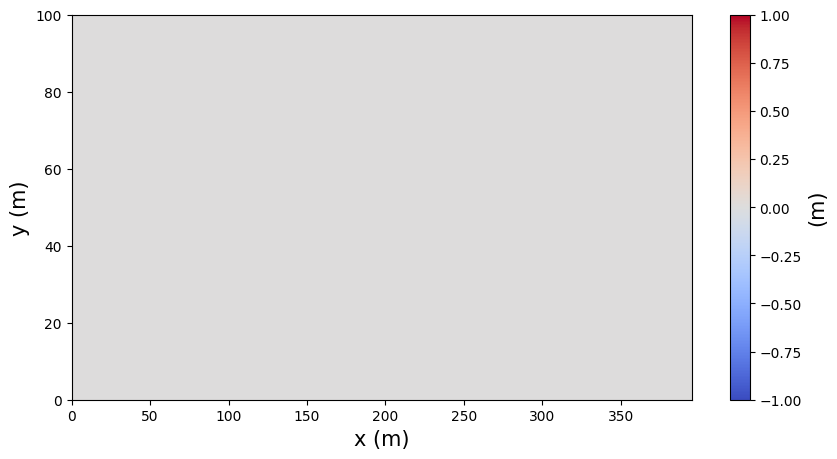

In [7]:
#Inputs
H = 2.0 #(m)
T = 10.0 #(s)
h = 50.0 #(m)
#------------------------

C = disper(T,h)
L = C*T
k = 2*np.pi/L
w = 2*np.pi/T

t_total = 10


dx = 1
dy = 1

x = np.arange(0,4*L+dx,dx)
y = np.arange(0,100+dy,dy)

#Creamos el grafico
alto  = 5
ancho = 10

fig1, ax = plt.subplots(figsize=(ancho,alto))

#Definir cosas que no se mueven
ax.set_xlabel('x (m)',fontsize=15)
ax.set_ylabel('y (m)',fontsize=15)
ax.set_xlim(0,4*L)
ax.set_ylim(0,100)

X, Y = np.meshgrid(x,y)

quad = ax.pcolormesh(X,Y,np.zeros(np.shape(X)),shading='gouraud',cmap=plt.cm.coolwarm, vmin=-H/2, vmax = H/2)

cbar = fig1.colorbar(quad)
cbar.ax.set_ylabel('(m)',fontsize=15)

time_text = ax.set_title('',fontsize=15)

In [8]:
def animate_0(t):
  #eta1 = (H/2)*np.cos(k*X + w*t)
  #eta2 = (H/2)*np.cos(k*X - w*t)
  #eta = eta1 + eta2
  eta = (H/2)*np.cos(k*X - w*t)
  time_text.set_text('Tiempo = %0.1f ' % (t,))
  quad.set_array(eta.ravel())
  return quad, time_text

anim = animation.FuncAnimation(fig1, animate_0, frames= t_total, interval=200, blit=True)

HTML(anim.to_jshtml())